In [1]:
# Description: This program attempts to optimize a users portfolio using the Efficient Frontier & Python.

In [2]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
assets =  ['PRGO', 'CNC', 'CVS', 'CI', 'UHS', 'TAP', 'SJM', 'ADM', 'TSN', 'COTY', 'PVH', 'CCL', 'MHK', 'F', 'KSS', 'XRX', 'NLOK', 'FIS', 'DXC', 'WDC', 'MRO', 'HFC', 'NOV', 'FANG', 'KMI']

In [4]:
# Assign weights to the stocks. Weights must = 1 so 0.04 for each
weights = np.array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04])
weights

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04])

In [5]:
#Get the stock starting date
stockStartDate = '2015-01-01'
# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
stockEndDate = '2020-12-31'

In [6]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=stockEndDate)['Adj Close']

In [7]:
df

,PRGO,CNC,CVS,CI,UHS,TAP,SJM,ADM,TSN,COTY,...,XRX,NLOK,FIS,DXC,WDC,MRO,HFC,NOV,FANG,KMI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.682983,26.110001,81.299774,102.669853,108.863640,64.919373,85.618027,43.294144,36.114426,17.598106,...,25.741146,10.679129,57.781498,21.194197,92.755753,25.944307,30.981520,60.103676,57.243153,32.182369
2015-01-05,155.065689,26.040001,80.496178,100.902596,106.636742,64.523842,84.220581,41.796066,35.282745,17.546425,...,25.179522,10.528893,56.781605,20.765289,91.529411,24.737806,29.643602,57.359596,54.711960,31.310341
2015-01-06,154.774155,26.125000,80.556015,101.301964,106.675980,64.216194,83.547447,40.972122,35.490669,17.417217,...,24.842550,10.366140,56.707546,20.818903,89.488342,24.365879,29.297041,56.652916,54.797924,30.693913
2015-01-07,157.359985,26.267500,82.009331,103.678261,109.864296,66.272942,85.413506,41.588005,35.924572,17.477512,...,25.160803,10.462123,57.642632,20.969694,90.832268,24.665234,28.676453,56.707985,55.638474,31.099852
2015-01-08,160.951950,26.672501,83.753311,108.960030,110.992462,68.320908,86.649055,40.980453,37.244404,17.623945,...,25.853477,10.654092,58.457367,21.207605,92.713745,25.164160,29.571074,58.396648,58.351151,31.829046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,44.009998,58.020000,67.518372,198.830002,136.929993,45.470001,116.089996,49.439999,64.790001,7.180000,...,22.333601,21.040001,140.789993,22.900000,49.919998,6.630000,25.350000,13.500000,48.250000,13.582397
2020-12-28,44.650002,58.830002,67.627640,202.160004,136.529999,45.480000,116.330002,49.700001,64.379997,7.050000,...,23.025963,21.020000,140.279999,24.059999,50.060001,6.630000,25.219999,13.560000,47.630001,13.395799
2020-12-29,44.549999,59.029999,67.448837,204.050003,136.179993,45.540001,115.330002,49.450001,63.500000,6.860000,...,22.660000,20.830000,141.289993,23.660000,48.290001,6.570000,25.270000,13.480000,47.000000,13.327051


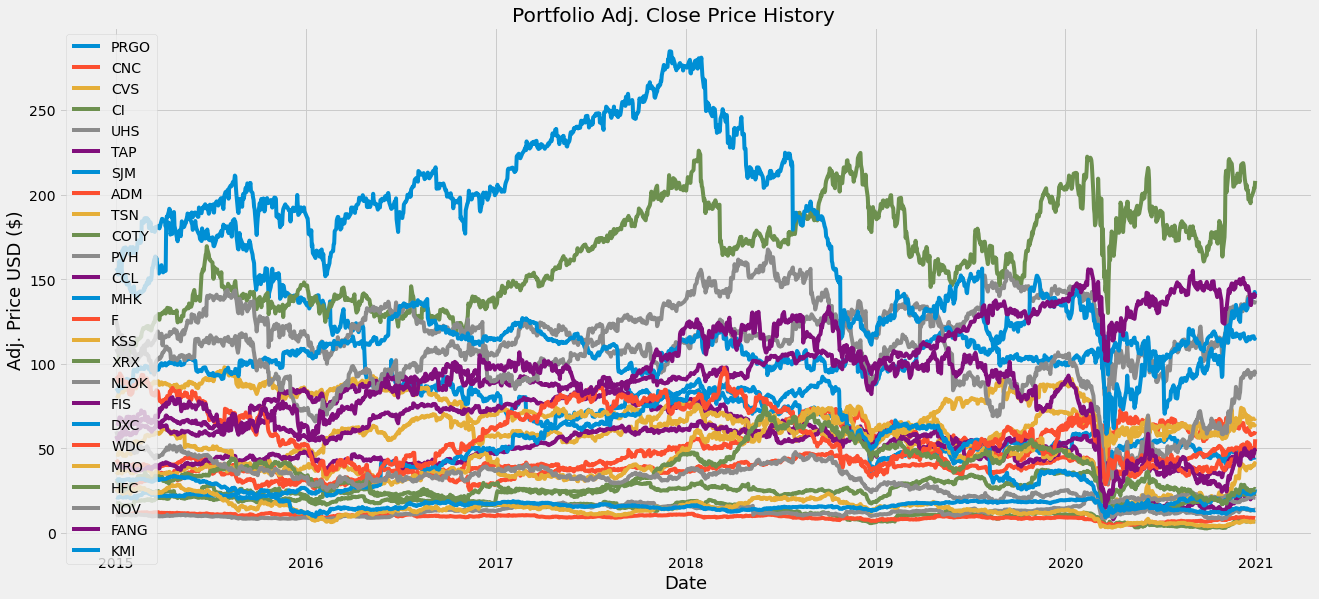

In [8]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(20,9)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [9]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,PRGO,CNC,CVS,CI,UHS,TAP,SJM,ADM,TSN,COTY,...,XRX,NLOK,FIS,DXC,WDC,MRO,HFC,NOV,FANG,KMI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.010322,-0.002681,-0.009884,-0.017213,-0.020456,-0.006093,-0.016322,-0.034602,-0.023029,-0.002937,...,-0.021818,-0.014068,-0.017305,-0.020237,-0.013221,-0.046503,-0.043184,-0.045656,-0.044218,-0.027096
2015-01-06,-0.001880,0.003264,0.000743,0.003958,0.000368,-0.004768,-0.007993,-0.019713,0.005893,-0.007364,...,-0.013383,-0.015458,-0.001304,0.002582,-0.022300,-0.015035,-0.011691,-0.012320,0.001571,-0.019688
2015-01-07,0.016707,0.005455,0.018041,0.023458,0.029888,0.032028,0.022335,0.015032,0.012226,0.003462,...,0.012811,0.009259,0.016490,0.007243,0.015018,0.012286,-0.021183,0.000972,0.015339,0.013225
2015-01-08,0.022826,0.015418,0.021266,0.050944,0.010269,0.030902,0.014466,-0.014609,0.036739,0.008378,...,0.027530,0.018349,0.014134,0.011345,0.020714,0.020228,0.031197,0.029778,0.048755,0.023447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.008016,-0.011247,-0.000588,-0.000754,-0.000949,0.001763,0.007988,0.001824,0.003718,-0.031039,...,-0.008780,0.003817,0.045134,0.000437,-0.000200,-0.026432,-0.003929,-0.009538,0.009414,0.000000
2020-12-28,0.014542,0.013961,0.001618,0.016748,-0.002921,0.000220,0.002067,0.005259,-0.006328,-0.018106,...,0.031001,-0.000951,-0.003622,0.050655,0.002805,0.000000,-0.005128,0.004444,-0.012850,-0.013738
2020-12-29,-0.002240,0.003400,-0.002644,0.009349,-0.002564,0.001319,-0.008596,-0.005030,-0.013669,-0.026950,...,-0.015893,-0.009039,0.007200,-0.016625,-0.035358,-0.009050,0.001983,-0.005900,-0.013227,-0.005132


In [10]:
#Covariance matrix annual
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,PRGO,CNC,CVS,CI,UHS,TAP,SJM,ADM,TSN,COTY,...,XRX,NLOK,FIS,DXC,WDC,MRO,HFC,NOV,FANG,KMI
PRGO,0.150458,0.039155,0.038755,0.036537,0.045143,0.035362,0.017256,0.031224,0.021277,0.055167,...,0.047922,0.023355,0.030719,0.051853,0.053643,0.051070,0.049775,0.054792,0.051503,0.039473
CNC,0.039155,0.140145,0.039309,0.070124,0.068900,0.031424,0.017750,0.035100,0.023101,0.047723,...,0.050039,0.027611,0.039820,0.062387,0.055616,0.056783,0.043678,0.053300,0.054220,0.041231
CVS,0.038755,0.039309,0.073222,0.043699,0.034338,0.028540,0.018006,0.030947,0.022085,0.045216,...,0.039483,0.020225,0.029388,0.042438,0.040593,0.040150,0.040767,0.040655,0.034061,0.029685
CI,0.036537,0.070124,0.043699,0.103139,0.058153,0.030922,0.016702,0.034361,0.027263,0.042922,...,0.051023,0.024616,0.039421,0.069105,0.053659,0.059962,0.051495,0.058348,0.057214,0.043891
UHS,0.045143,0.068900,0.034338,0.058153,0.128779,0.040133,0.012689,0.041861,0.043403,0.065108,...,0.071518,0.024541,0.045482,0.088778,0.068759,0.073688,0.060061,0.077343,0.081025,0.058193
TAP,0.035362,0.031424,0.028540,0.030922,0.040133,0.087133,0.022905,0.035011,0.022999,0.050166,...,0.049108,0.018247,0.030417,0.052897,0.043015,0.056820,0.049733,0.055450,0.058118,0.035126
SJM,0.017256,0.017750,0.018006,0.016702,0.012689,0.022905,0.056011,0.020685,0.015468,0.013939,...,0.013397,0.012901,0.014648,0.016026,0.012406,0.007487,0.011519,0.011297,0.007026,0.011758
ADM,0.031224,0.035100,0.030947,0.034361,0.041861,0.035011,0.020685,0.068505,0.030263,0.046014,...,0.050640,0.022029,0.034981,0.056705,0.053420,0.065434,0.047787,0.058396,0.053252,0.042483
TSN,0.021277,0.023101,0.022085,0.027263,0.043403,0.022999,0.015468,0.030263,0.093725,0.052775,...,0.043606,0.016047,0.026783,0.058095,0.043834,0.040194,0.032161,0.051576,0.051409,0.038359
COTY,0.055167,0.047723,0.045216,0.042922,0.065108,0.050166,0.013939,0.046014,0.052775,0.334973,...,0.087691,0.019955,0.035901,0.100903,0.076501,0.098781,0.073889,0.098952,0.102284,0.070322


In [11]:
#Expected portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06450724677471453

In [12]:
#Expected portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.2539827686570775

In [13]:
#Portfolio annual simple return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.060007894299936845

In [14]:
#Show the expected annual return, volatility or risk, and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 6.0%
Annual volatility/standard deviation/risk : 25.0%
Annual variance : 6.0%
